## This is an example for visualizing embedding space for ASVspoof5 using umap.

In [1]:
# Load lib
import kaldiio
import numpy as np
import os

import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [2]:
import sys
print(sys.executable)

# If the env is not correct
! python -m ipykernel install --user --name wedefense_pip --display-name "Python (wedefense_pip)"


/mnt/matylda4/qzhang/software/anaconda3/envs/wedefense_pip/bin/python


In [ ]:
# Set path to wedefense
! conda install ipywidgets -y # For warn when using tqdm: IProgress not found. Please update jupyter and ipywidgets

import sys
sys.path.insert(0, "../../")
from wedefense.utils.embedding_visualization import draw_emb_fig, get_utt2embs

In [4]:
# Set latex and font type
import shutil
from matplotlib import rc
if shutil.which('tex') and shutil.which('latex'):
    rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
    rc('text', usetex=True)
else:
    print("Cannot find tex or latex. matplotlib.rc usetex is disabled")
# default fontsize
rc('font', size=9)

In [5]:
# Set parameters for UMAP:
redu_dim=2
redu_n_neighbors=200
redu_min_dist=0.0
redu_metric='cosine'
redu_random_state = 2024

In [6]:
# To distinguish labels in dev and eval, we provide label2num and numb2label.

# ## you can read from file
# label2num_file = "/mnt/matylda4/qzhang/workspace/02ASVspoof/data/label/label2num.all"
# label2num_mul=dict([line.split() for line in open(label2num_file)])
# num2label_file = "/mnt/matylda4/qzhang/workspace/02ASVspoof/data/label/num2label.all"
# num2label_mul=dict([line.split() for line in open(num2label_file)])

## or assign them directly
labels = ['nonspeech', 'bonafide'] + [f"A{str(i).zfill(2)}" for i in range(1, 32)]
label2num_mul = {label: idx for idx, label in enumerate(labels)}
num2label_mul = {str(idx): label for label, idx in label2num_mul.items()}

start to process embedding from /mnt/matylda6/pengjy/shared_model_weights/lin/wedefense/egs/detection/asvspoof5/v15_ssl_mhfa/exp/MHFA_wav2vec2_large_960-FT-1stage_frozen/embeddings/dev/embedding.scp


/mnt/matylda4/qzhang/software/anaconda3/envs/wedefense_pip/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


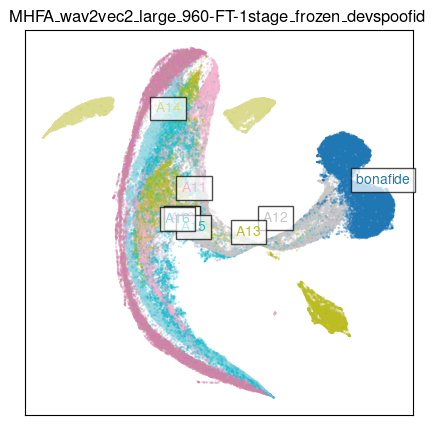

In [7]:
main_dir="/mnt/matylda6/pengjy/shared_model_weights/lin/wedefense/egs/detection/asvspoof5/v15_ssl_mhfa/exp/"
dset = 'dev'
model = "MHFA_wav2vec2_large_960-FT-1stage_frozen"
# dsetdir = DSETDIRs[DSETs.index(dset)]

emb_scp=os.path.join(main_dir,model,"embeddings", dset, "embedding.scp")

utt2lab_file = f"/mnt/matylda6/pengjy/data/asv/asv5/ASVspoof5.{dset}.track_1.tsv"
utt2lab_mul = dict( [ [line.split()[1], line.split()[-3] ] for line in open(utt2lab_file)])
# E_1607 E_0009538969 M C05 2 E_0009486171 AC1 A26 spoof -

emb_scp=os.path.join(main_dir,model,"embeddings", dset, "embedding.scp")
redudim_name = f"{emb_scp.split('/')[-4]}_{emb_scp.split('/')[-2]}"
fig, ax = plt.subplots(1, 1, figsize=(5, 5))  # 
draw_emb_fig(ax, emb_scp=emb_scp, 
         utt2lab=utt2lab_mul, label2num=label2num_mul, 
         num2label=num2label_mul, redudim_name=redudim_name)
ax.set_title(redudim_name + ' (spoofid)', fontsize=12)

os.makedirs("figs", exist_ok=True)
fig.savefig(f"figs/{redudim_name}_spoofid.png", dpi=100, bbox_inches="tight")